# To Expose Unsupervised Machine Learning

#### From the given iris dataset, predict optimum number of clusters and represent it visually

### Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [ ]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:,1:5].values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.shape

(150, 6)

In [ ]:
dataset['Species'].value_counts()

# So it has 3 variaties of iris flower, having 50 in each class or type

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


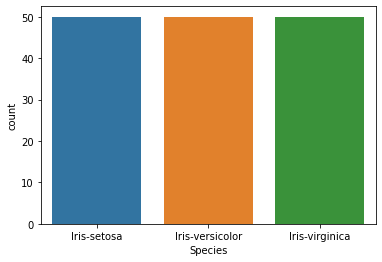

In [ ]:
import seaborn as sns
sns.countplot(dataset['Species'])

### Univariate Analysis

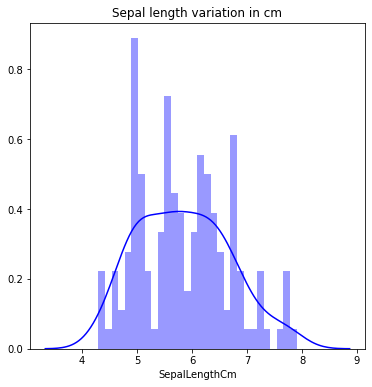

In [ ]:
# SepalLengthCm
plt.figure(figsize = (6,6))
plt.title('Sepal length variation in cm')
sns.distplot(dataset['SepalLengthCm'], bins = 30, color= 'blue')

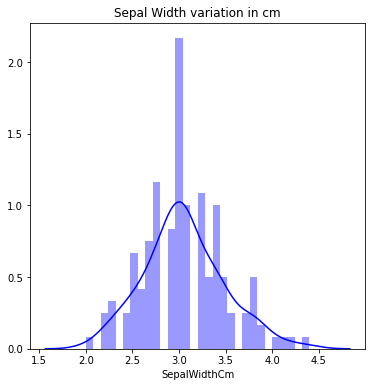

In [ ]:
# SepalWidthCm
plt.figure(figsize = (6,6))
plt.title('Sepal Width variation in cm')
sns.distplot(dataset['SepalWidthCm'], bins = 30, color= 'blue')

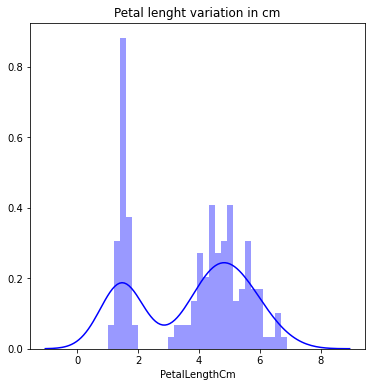

In [ ]:
# PetalLengthCm
plt.figure(figsize = (6,6))
plt.title('Petal lenght variation in cm')
sns.distplot(dataset['PetalLengthCm'], bins = 30, color= 'blue')


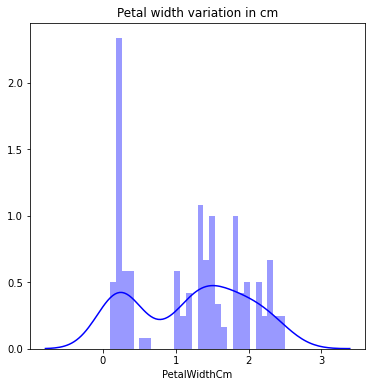

In [ ]:
# PetalWidthCm
plt.figure(figsize=(6,6))
plt.title('Petal width variation in cm')
sns.distplot(dataset['PetalWidthCm'], bins= 30, color='blue')

### Bivariate Analysis

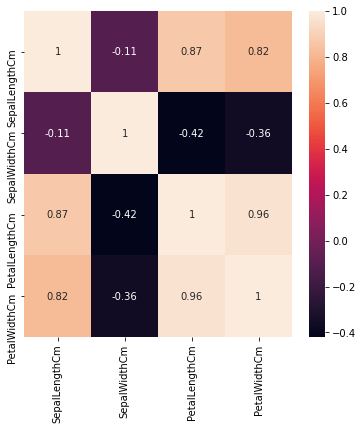

In [ ]:
corr = dataset.drop('Id', axis=1).corr(method = 'pearson')
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot= True,robust= True)

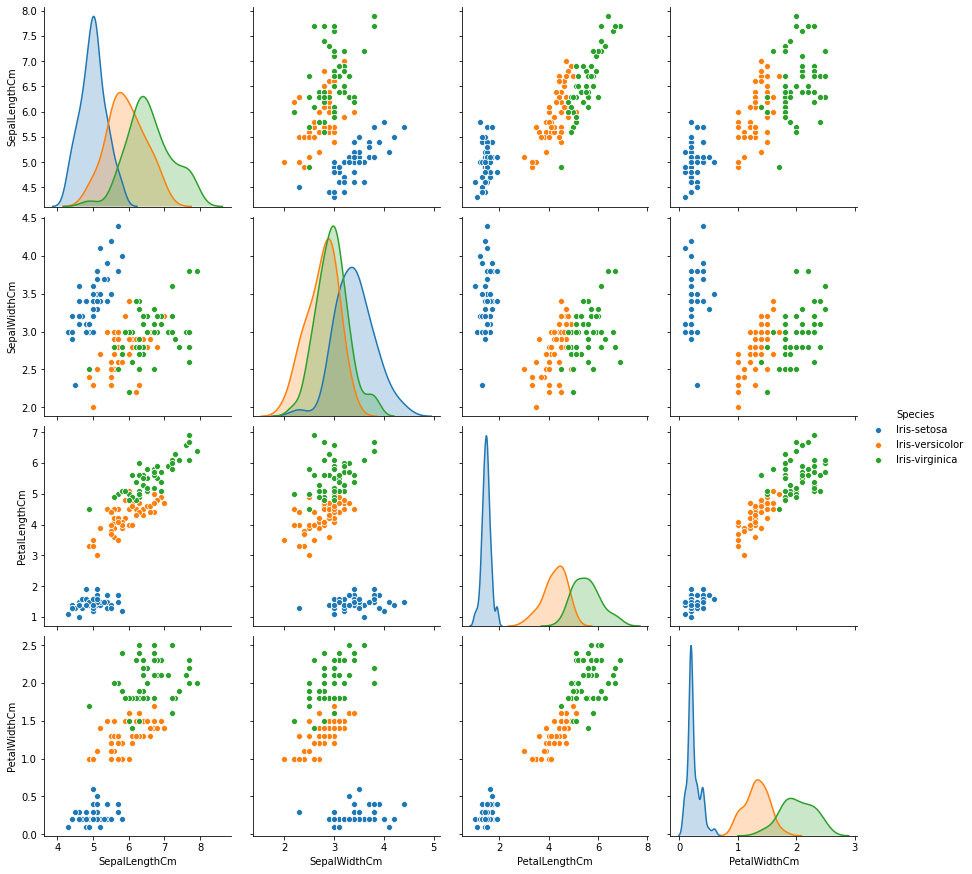

In [ ]:
sns.pairplot(dataset.drop('Id',axis=1), hue= 'Species', height= 3, diag_kind = 'auto')

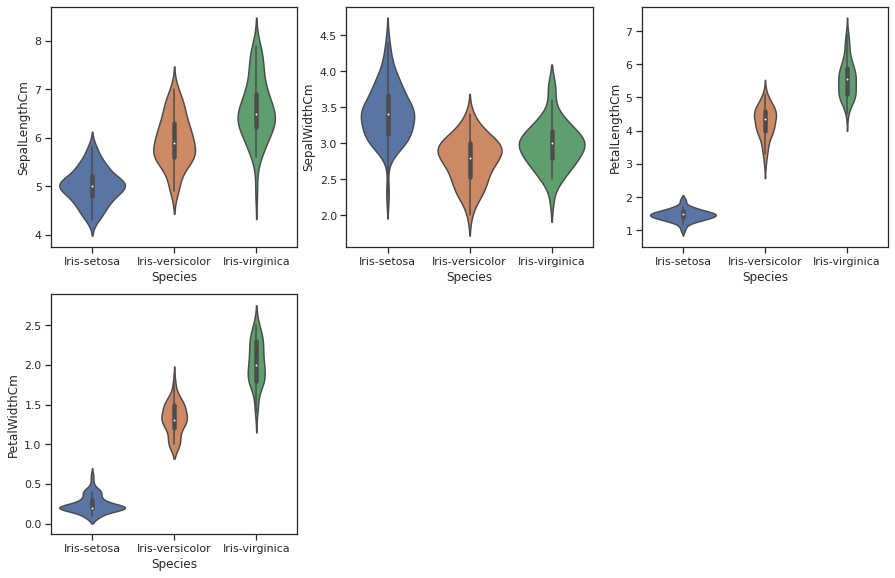

In [ ]:
sns.set(style= 'ticks')
plt.figure(figsize= (15,15))
plt.subplot(3,3,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = dataset)
plt.subplot(3,3,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm' , data = dataset)
plt.subplot(3,3,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = dataset)
plt.subplot(3,3,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = dataset)
plt.show()

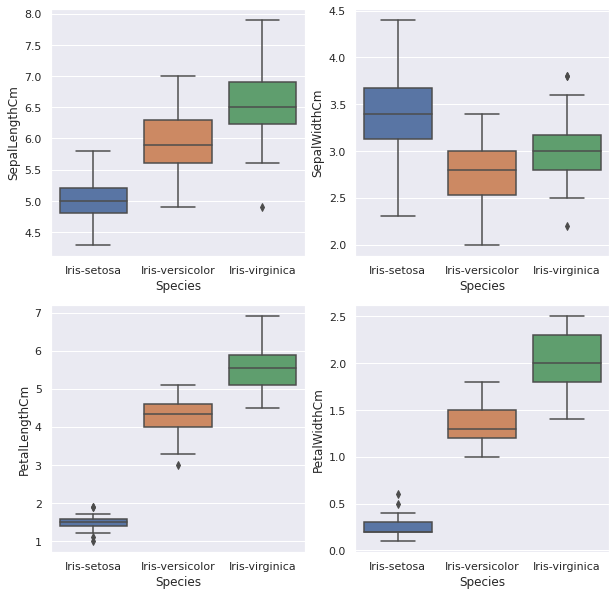

In [ ]:
sns.set(style= 'darkgrid')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = dataset)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = dataset)
plt.show()

### Using Elbow method to find optimum number of clustering

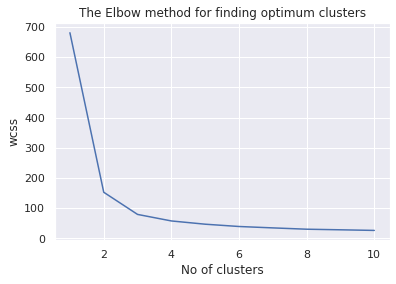

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method for finding optimum clusters')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

# from below figure optimum clusters = 3

### Training Kmeans model on the dataset

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Visualising the Clusters

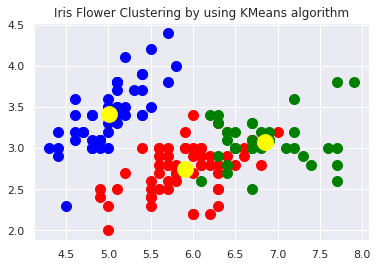

In [ ]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s= 100, c= 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=250, c = 'yellow', label = 'centroid')
plt.title('Iris Flower Clustering by using KMeans algorithm')
plt.show()